In [10]:
from sklearn.datasets import make_circles
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [80]:
X,y = make_circles(n_samples=100,noise=.1,random_state=43)
X

array([[-0.95762125,  0.63919813],
       [ 1.05376225,  0.34455723],
       [-0.3716654 ,  0.98184962],
       [-0.92925592,  0.43727774],
       [ 0.55442541,  0.62543855],
       [ 0.15478914, -0.74051965],
       [-0.57208725,  0.47816042],
       [ 0.62029604,  0.34030569],
       [ 0.15527077,  1.03287412],
       [-0.49213939, -0.48667386],
       [ 0.42338188,  0.80868015],
       [ 0.0535339 , -1.02039994],
       [-0.16392438, -0.66343326],
       [ 1.01628182, -0.0114492 ],
       [ 0.26855189, -0.76785064],
       [ 0.08885364,  0.83462353],
       [ 0.98721408,  0.52601248],
       [ 0.88347477,  0.1208579 ],
       [ 0.53084335, -0.41333425],
       [-0.47492582, -0.64672683],
       [ 0.63123476, -0.70679073],
       [ 0.0724837 ,  0.97918829],
       [-0.58466097, -0.23591856],
       [ 0.60354244, -0.73328975],
       [-0.02497157, -0.8744127 ],
       [ 0.35966426, -0.69529781],
       [ 0.4412472 , -0.41906226],
       [ 0.37477095,  0.55804985],
       [-0.06525577,

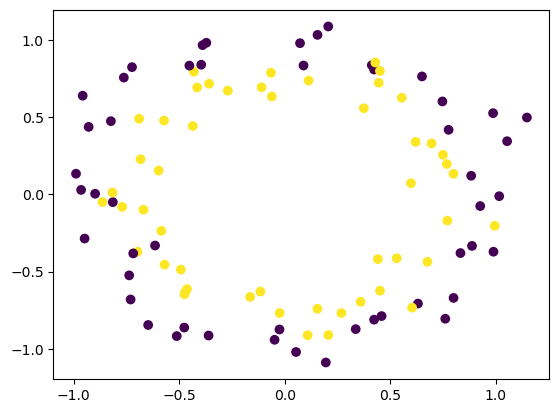

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=43)

In [73]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [74]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,825 (38.38 KB)

 Trainable params: 9,825 (38.38 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [76]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [77]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=True,callbacks=callback)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5258 - loss: 0.6939 - val_accuracy: 0.4500 - val_loss: 0.6942
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5453 - loss: 0.6929 - val_accuracy: 0.4500 - val_loss: 0.6939
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5141 - loss: 0.6930 - val_accuracy: 0.4500 - val_loss: 0.6936
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5336 - loss: 0.6928 - val_accuracy: 0.4500 - val_loss: 0.6936
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5023 - loss: 0.6927 - val_accuracy: 0.4500 - val_loss: 0.6935
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5258 - loss: 0.6924 - val_accuracy: 0.4500 - val_loss: 0.6935
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4789 - loss: 0.6928 - val_accuracy: 0.4500 - val_loss: 0.6933
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5297 - loss: 0.6921 - val_accuracy: 0.4500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 205us/step


<Axes: >

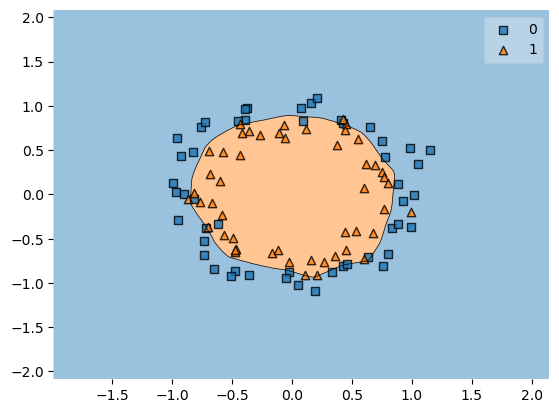

In [78]:
plot_decision_regions(X,y,clf=model)